In [17]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [18]:
inputdata_df = pd.read_csv('online_shoppers_intention.csv')

In [19]:
inputdata_df.shape

(12330, 18)

In [20]:
inputdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [21]:
inputdata_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [22]:
dataForModel = inputdata_df

In [23]:
Revenue_map={False:0,True:1}
dataForModel['Revenue']  = dataForModel['Revenue'].map(Revenue_map)

Weekend_map={False:0,True:1}
dataForModel['Weekend'] = dataForModel['Weekend'].map(Weekend_map)

In [24]:
dataForModel.shape

(12330, 18)

In [25]:
dataForModel = pd.get_dummies(dataForModel, columns = ['Month', 'OperatingSystems', 
                                                       'Browser', 'Region', 
                                                       'TrafficType', 'VisitorType'
                                                      ], drop_first=True)

In [26]:
dataForModel.shape

(12330, 69)

In [27]:
dataForModel.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficT

In [28]:
X = dataForModel.loc[:, dataForModel.columns != 'Revenue']
Y = dataForModel['Revenue']

In [29]:
## Standardise numerical values
num_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

#Standard Scaler
from sklearn import preprocessing

# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
X[num_cols] = scaler.fit_transform(X[num_cols])

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [31]:
# Split the data into 40% test and 60% training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(ratio = 'auto', k = 5, random_state = 0)
sample_X, sample_y = sm.fit_sample(X_train, Y_train)


print ("Distribution of class labels before resampling {}".format(Counter(Y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(sample_y)))

Distribution of class labels before resampling Counter({0: 6252, 1: 1146})
Distribution of class labels after resampling Counter({0: 6252, 1: 6252})


/Users/gurukrupa/anaconda3/lib/python3.6/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)


In [33]:
from sklearn.model_selection import GridSearchCV

radm_clf = RandomForestClassifier(class_weight='balanced')

## Configuring parameters and values for searched 
tuned_parameters = [{'max_depth': [10, 20, 30, 40, 50, 100, 200], 
                     'n_estimators': [10, 20, 30, 50, 100, 200, 300], 
                     'max_features': ['sqrt', 0.5, 0.75]}]

## Initializing the RF classifier radm_clf = RandomForestClassifier()
## Configuring search with the tunable parameters 
clf = GridSearchCV(radm_clf, tuned_parameters, cv=5, scoring='roc_auc')

## Fitting the training set 
clf.fit(sample_X, sample_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [34]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=200, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [35]:
# Cross validation to find best number of features 

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(max_depth=40, max_features='sqrt', 
                                  min_samples_split=2, n_estimators=300, 
                                  class_weight='balanced') 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='roc_auc')   
rfecv = rfecv.fit(sample_X, sample_y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 62
Best features : Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_6', 'OperatingSystems_8', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13',


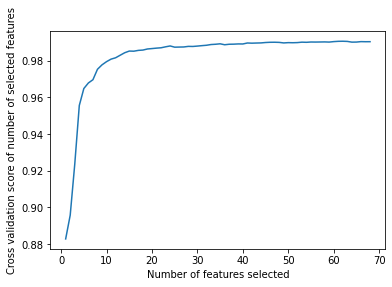

In [36]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [37]:
# Create list of depth values for which we need to model and check model metrics
dep = [2, 4, 6, 8, 10, 12, 14, 16]
train_roc = np.empty(len(dep))
validate_roc = np.empty(len(dep))

train_recall = np.empty(len(dep))
validate_recall = np.empty(len(dep))

In [38]:
# loop through multiple depth values and get model metrics
for i, k in enumerate(dep):
    clf_select_features = RandomForestClassifier(max_depth=k, max_features='sqrt', 
                                  min_samples_split=2, n_estimators=300, 
                                  class_weight='balanced')
    clf_select_features.fit(sample_X, sample_y)
    
    print(classification_report(Y_test, clf_select_features.predict(X_test)))
    
    train_roc[i] = roc_auc_score(sample_y, clf_select_features.predict(sample_X))
    validate_roc[i] = roc_auc_score(Y_test, clf_select_features.predict(X_test))
    
    train_recall[i] = recall_score(sample_y, clf_select_features.predict(sample_X))
    validate_recall[i] = recall_score(Y_test, clf_select_features.predict(X_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      4170
           1       0.46      0.80      0.58       762

    accuracy                           0.82      4932
   macro avg       0.71      0.81      0.73      4932
weighted avg       0.88      0.82      0.84      4932

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4170
           1       0.53      0.80      0.64       762

    accuracy                           0.86      4932
   macro avg       0.75      0.84      0.78      4932
weighted avg       0.89      0.86      0.87      4932

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4170
           1       0.56      0.80      0.66       762

    accuracy                           0.87      4932
   macro avg       0.76      0.84      0.79      4932
weighted avg       0.90      0.87      0.88      4932

              preci

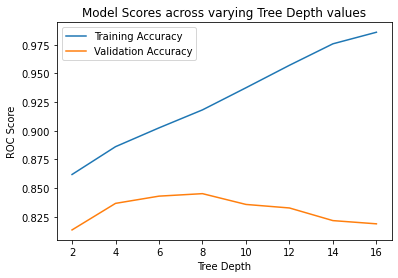

In [39]:
# Bias and Variance tradeoff

plt.title('Model Scores across varying Tree Depth values')
plt.plot(dep, train_roc, label = 'Training Accuracy')
plt.plot(dep, validate_roc, label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Tree Depth')
plt.ylabel('ROC Score')
plt.show()

In [40]:
## Initializing the Random Forest Model with the optimal values 
radm_clf = RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_split=2, 
                                  n_estimators=300, class_weight='balanced')

## Fitting the model with the training set 
radm_clf.fit( sample_X, sample_y )

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [88]:
## Importing the metrics
from sklearn import metrics

## Defining the matrix to draw the confusion matrix from actual and 
## predicted class labels
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    sn.heatmap(cm, cmap=plt.cm.BrBG, annot=True, fmt='.2f', 
               xticklabels = ['Did Not Buy', 'Buy'], 
               yticklabels = ['Did Not Buy', 'Buy'] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

In [42]:
def print_model_metrics(test_y, pred_y):
    print( metrics.classification_report( test_y, pred_y ) )
    print('accuracy = ', round(float(metrics.accuracy_score(test_y, pred_y)), 2))
    print('recall = ', round(float(metrics.recall_score(test_y, pred_y)), 2))
    print('precision = ', round(float(metrics.precision_score(test_y, pred_y)), 2))
    print('roc_auc = ', round(float(metrics.roc_auc_score(test_y, pred_y)), 2))

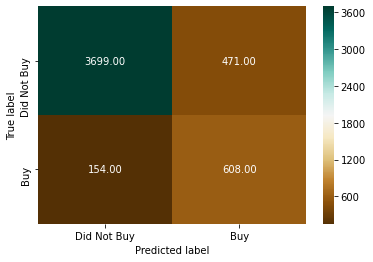

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4170
           1       0.56      0.80      0.66       762

    accuracy                           0.87      4932
   macro avg       0.76      0.84      0.79      4932
weighted avg       0.90      0.87      0.88      4932

accuracy =  0.87
recall =  0.8
precision =  0.56
roc_auc =  0.84


In [82]:
pred_y = radm_clf.predict(X_test)

cm = draw_cm( Y_test, pred_y )

print_model_metrics(Y_test, pred_y)

In [44]:
# Print the name and gini importance of each feature
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
    feature_rank.loc[f] = [f+1, X_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

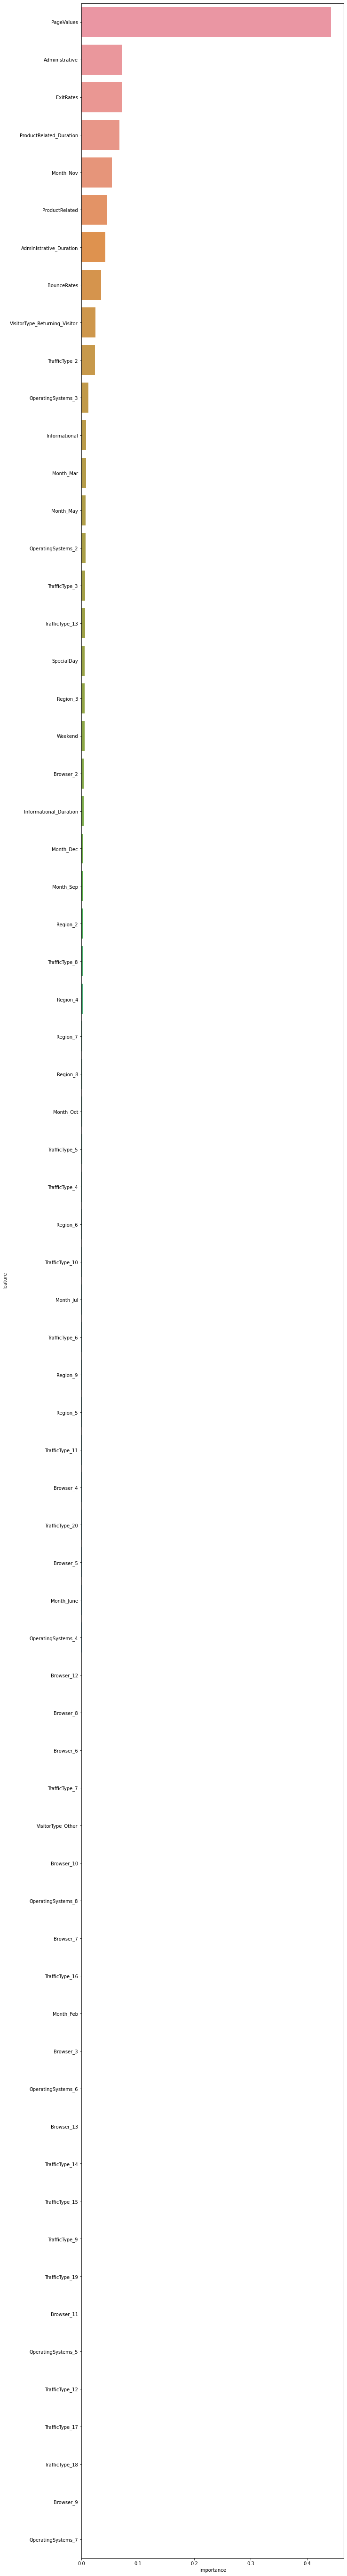

In [45]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

a4_dims = (10, 100)
fig, ax = plt.subplots(figsize=a4_dims)

sn.barplot( ax=ax, y = 'feature', x = 'importance', data = feature_rank )

In [46]:
# features that have an importance of more than 0.001
select_features = feature_rank.loc[feature_rank.importance > 0.01]
select_features.count()

rank          11
feature       11
importance    11
dtype: int64

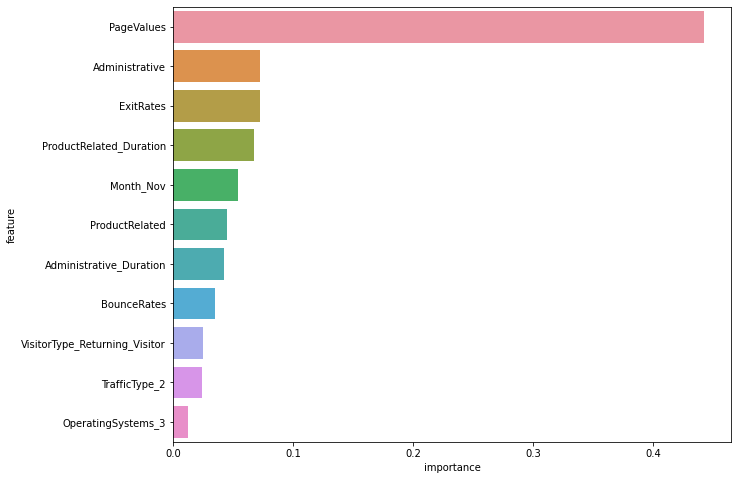

In [47]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)

sn.barplot( ax=ax, y = 'feature', x = 'importance', data = select_features )

In [48]:
select_features

,rank,feature,importance
0,1,PageValues,0.442909
1,2,Administrative,0.072491
2,3,ExitRates,0.072232
3,4,ProductRelated_Duration,0.067750
4,5,Month_Nov,0.054540
5,6,ProductRelated,0.045032
6,7,Administrative_Duration,0.042712
7,8,BounceRates,0.035306
8,9,VisitorType_Returning_Visitor,0.024702
9,10,TrafficType_2,0.023800


In [49]:
# Make the subsets with imporant features only
X_train_subset = X_train[select_features['feature'].tolist()]
X_test_subset = X_test[select_features['feature'].tolist()]

In [50]:
sm = SMOTE(ratio = 'auto', k = 5, random_state = 0)
sample_X, sample_y = sm.fit_sample(X_train_subset, Y_train)


print ("Distribution of class labels before resampling {}".format(Counter(Y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(sample_y)))

Distribution of class labels before resampling Counter({0: 6252, 1: 1146})
Distribution of class labels after resampling Counter({0: 6252, 1: 6252})


/Users/gurukrupa/anaconda3/lib/python3.6/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)


In [51]:
## Initializing the Random Forest Model with the optimal values 
radm_clf = RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_split=2, 
                                  n_estimators=300, class_weight='balanced')

## Fitting the model with the training set 
radm_clf.fit( sample_X, sample_y )

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

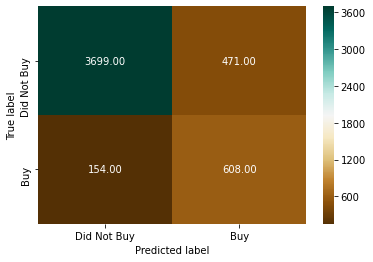

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      4170
           1       0.56      0.80      0.66       762

    accuracy                           0.87      4932
   macro avg       0.76      0.84      0.79      4932
weighted avg       0.90      0.87      0.88      4932

accuracy =  0.87
recall =  0.8
precision =  0.56
roc_auc =  0.84


In [89]:
pred_y = radm_clf.predict(X_test_subset)
cm = draw_cm( Y_test, pred_y )
print_model_metrics(Y_test, pred_y)

In [53]:
print(classification_report(Y_test, pred_y, target_names=['Did Not Buy', 'Buy']))

              precision    recall  f1-score   support

 Did Not Buy       0.96      0.89      0.92      4170
         Buy       0.56      0.80      0.66       762

    accuracy                           0.87      4932
   macro avg       0.76      0.84      0.79      4932
weighted avg       0.90      0.87      0.88      4932



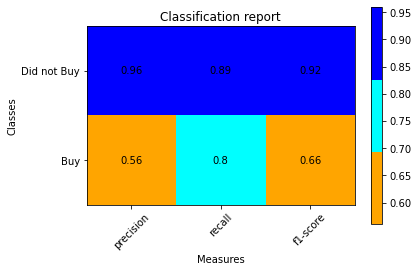

In [100]:
from matplotlib import colors
from matplotlib.colors import ListedColormap
#ddl_heat = ['#DBDBDB','#DCD5CC','#DCCEBE','#DDC8AF','#DEC2A0','#DEBB91',\
#            '#DFB583','#DFAE74','#E0A865','#E1A256','#E19B48','#E29539']

ddl_heat = ["orange", "cyan", "blue"]
ddlheatmap = colors.ListedColormap(ddl_heat)



def plot_classification_report(cr, title=None, cmap=ddlheatmap):
    title = title or 'Classification report'
    lines = cr.split('\n')
    classes = []
    matrix = []
    
    for line in lines[2:(len(lines)-4)]:
        s = line.split()
        if (len(s) > 0):
            classes.append(s[0])
            value = [float(x) for x in s[1: len(s) - 1]]
            matrix.append(value)
    fig, ax = plt.subplots(1)
    
    for column in range(len(matrix) + 1):
        for row in range(len(classes)):
            txt = matrix[row][column]
            ax.text(column,row,matrix[row][column],va='center',ha='center')
    
    fig = plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(len(classes)+1)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, ['Did not Buy', 'Buy'])
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    plt.show()

cr = classification_report(Y_test, pred_y)
plot_classification_report(cr)

In [55]:
y_pred_ml_df = pd.DataFrame( { 'actual': Y_test.values, 
                              'predicted': radm_clf.predict(X_test_subset)})

In [56]:
predict_prob_df = pd.DataFrame(radm_clf.predict_proba(X_test_subset))

In [57]:
df = pd.concat([y_pred_ml_df, predict_prob_df], axis = 1)
df.columns = ['actual', 'predicted', 'buy_0', 'buy_1']

In [58]:
df.to_csv('predictions_data.csv')

In [59]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

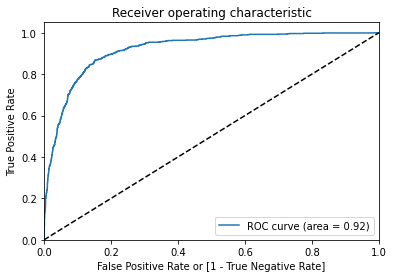

In [60]:
fpr, tpr, thresholds = draw_roc( df.actual, df.buy_1 )

<string>:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
<string>:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


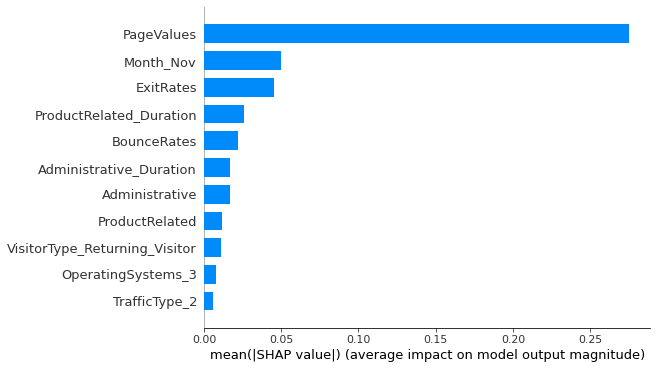

In [61]:
# let's take a look at the shap values

# importing shap
import shap

explainer = shap.TreeExplainer(radm_clf)
shap_values = explainer.shap_values(X_test_subset)

shap.summary_plot(shap_values[1], X_test_subset, plot_type = 'bar')

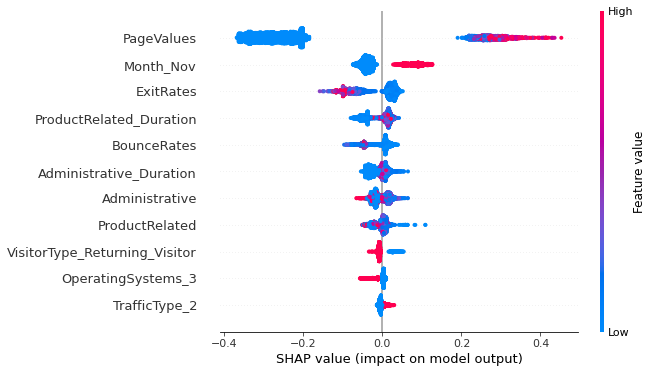

In [62]:
shap.summary_plot(shap_values[1], X_test_subset)

In [63]:
# let's create a function to check the customer's conditions

def customer_analysis(model, customer):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(customer)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], customer)

# let's do some real time prediction for patients

customers = X_test_subset.iloc[3,:].astype(float)
customer_analysis(radm_clf, customers)

In [64]:
shap_values = explainer.shap_values(X_train_subset.iloc[:50])
shap.initjs()

shap.force_plot(explainer.expected_value[1], shap_values[1], X_test_subset.iloc[:50])

In [65]:
from sklearn.tree import export_graphviz, export

# Extract single tree
estimator = radm_clf.estimators_[1]

export_graphviz(estimator, out_file = "buyprediction_tree.odt", 
                feature_names = X_train_subset.columns, class_names = ['0', '1'], filled=True)

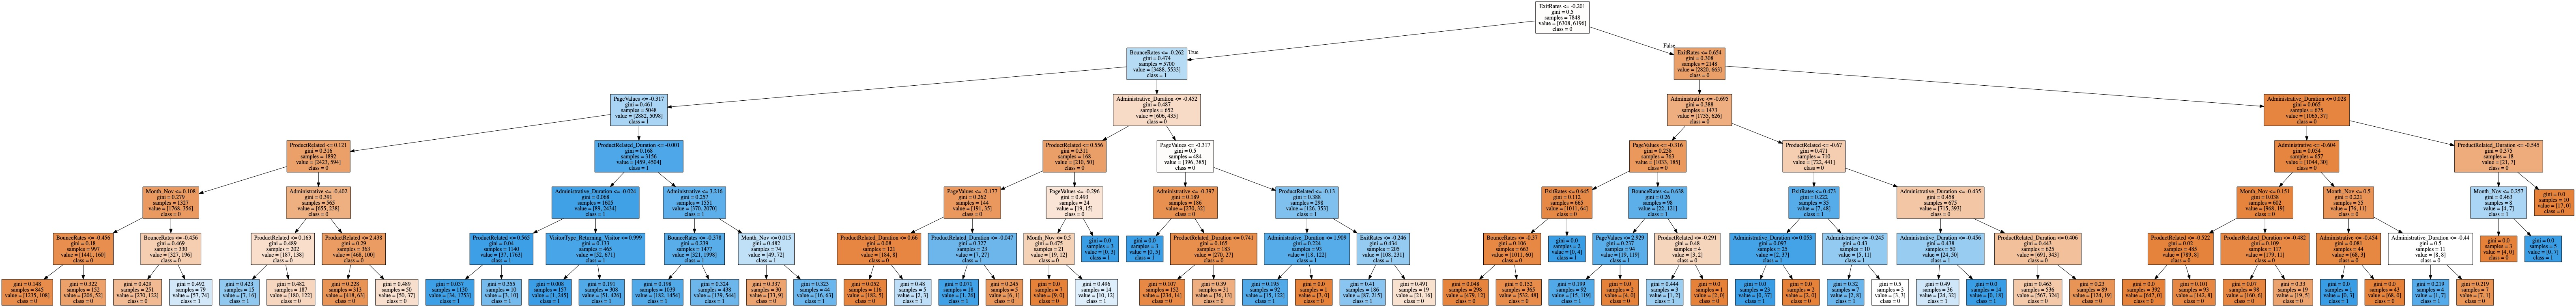

In [66]:
import pydotplus as pdot
sepsis_tree_graph = pdot.graphviz.graph_from_dot_file( 'buyprediction_tree.odt' )

sepsis_tree_graph.write_jpg( 'buyprediction_tree.jpg' )

from IPython.display import Image
Image(filename='buyprediction_tree.jpg')